# Linear Regression

In [5]:
from pathlib import Path

import pandas as pd
import pandas_profiling 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import linregress

from statsmodels.stats.diagnostic import het_white

In [6]:
sns.set_style("darkgrid")

## Get the Data

In [7]:
df = pd.read_csv(Path.cwd()/'Marketing.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


## EDA

### Profiling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


prof = pandas_profiling.ProfileReport(df)
prof.to_file(output_file='Marketing.html')

Output from profiling: 
- Number of variables: 9
- Number of observations: 301
- Missing cells: 0
- Duplicate rows: 2

This is definitely not a duplicates row.

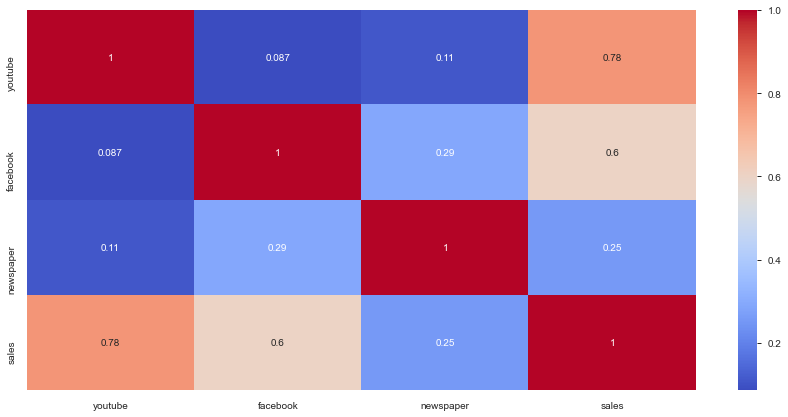

In [6]:
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

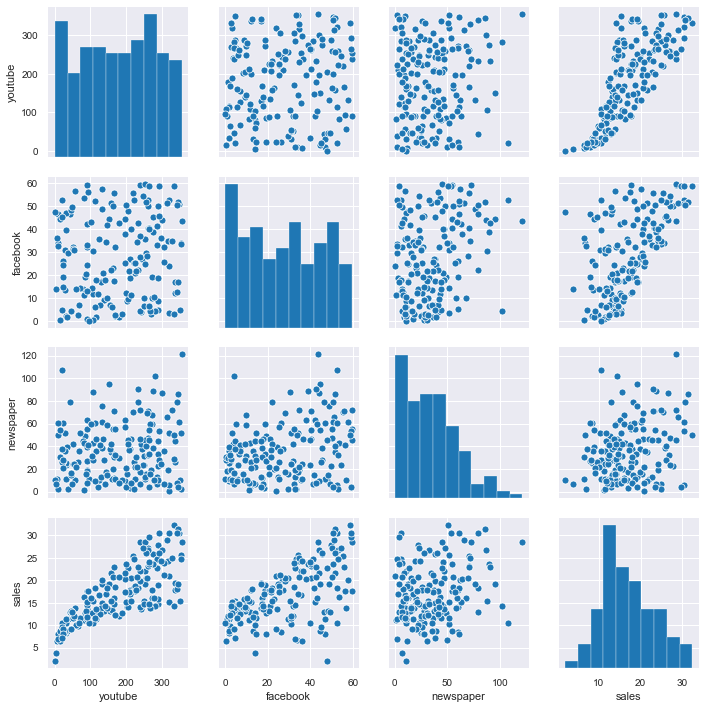

In [8]:
pairwise = sns.pairplot(data = df)
pairwise.savefig('pairwise.jpg')

## Model

In [57]:
# Multiple Linear Model
reg_multi = smf.ols('sales~youtube+facebook+newspaper', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           2.09e-83
Time:                        15:07:46   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5059      0.400      8.772      0.0

We should remove the variables: newspaper from the model as its p-value is higher than the risk alpha=5%.

In [8]:
# Multiple Linear Model
reg_multi = smf.ols('sales~youtube+facebook',data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     757.8
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           8.33e-85
Time:                        17:49:38   Log-Likelihood:                -360.21
No. Observations:                 171   AIC:                             726.4
Df Residuals:                     168   BIC:                             735.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5937      0.376      9.555      0.0

A good model is a simple model, in the sense that it includes only representative variables. To select the best model you can for example, use an algorithm to find the model which optimizes the following statistics criterium:

- R-Squared and Adjusted R-Squared:
    - They both assess the model performance with values range from 0.0 to 1.0. 
    - R-squared is also called the coefficient of determination. It’s a statistical measure of how well the regression line fits the data.
    - Adjusted R-squared actually adjusts the statistics based on the number of independent variables present. The Adjusted R-Squared value is always a bit lower than the R-Squared value because it reflects model complexity (the number of variables) as it relates to the data, and consequently is a more accurate measure of model performance. 
   
   
- AIC and BIC: 
    - The Akaike Information Criterion, or AIC for short, is a method for scoring and selecting a model: the model with the lowest AIC is selected. 
        - The AIC statistic is defined as AIC = -2/N * LL + 2 * k/N 
        - Where N is the number of examples in the training dataset, LL is the log-likelihood of the model on the training dataset, and k is the number of parameters in the model.
    
    
    - The Bayesian Information Criterion, or BIC for short (also called Schwarz Bayesian Criterium - SBC), is another method for scoring and selecting a model: the model with the lowest BIC is selected. 
        - The BIC statistic is calculated as BIC = -2 * LL + log(N) * k
        - Where log() has the base-e called the natural logarithm, LL is the log-likelihood of the model, N is the number of examples in the training dataset, and k is the number of parameters in the model.

    Important: the derivation of BIC under the Bayesian probability framework means that if a selection of candidate models includes a true model for the dataset, then the probability that BIC will select the true model increases with the size of the training dataset. This cannot be said for the AIC score (Page 217, Pattern Recognition and Machine Learning, 2006). A downside of BIC is that for smaller, less representative training datasets, it is more likely to choose models that are too simple (Page 235, The Elements of Statistical Learning, 2016).
    
You can also use the F-statistics to assess the benefits of having a more complex model with F-statistic: F-statistic is calculated as the ratio of mean squared error of the model and mean squared error of residuals. The F-test, when used for regression analysis, lets you compare two competing regression models in their ability to “explain” the variance in the dependent variable.

I our case, We can see that the variable newspaper get a high p-value (> 5%) so it should be removed from the model. if we do so, we improve a little bit the AIC and BIC values.

If the model was perfect, the real values and the predicted values would be equals, so on the plot, all data points would be aligned on the red line.

### Validity

#### Linearity

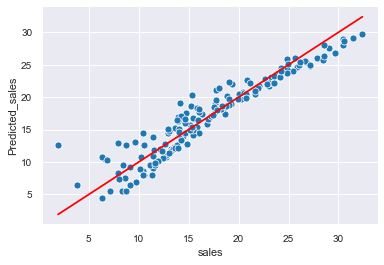

In [11]:
# Plot Predicted values VS Real values
df['Predicted_sales'] = reg_multi.predict()

X_plot = [df['sales'].min(), df['sales'].max()]

ax = sns.scatterplot(x="sales", y="Predicted_sales", data=df)

ax.set(xlabel='sales', ylabel='Predicted_sales')
plt.plot(X_plot, X_plot, color='r')
plt.show()

In [9]:
# Get Residuals
residuals = reg_multi.resid

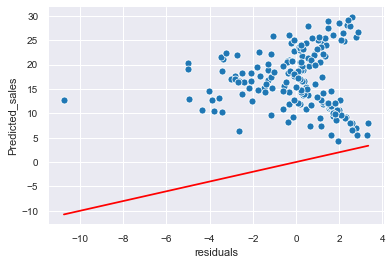

In [13]:
# Plot Predicted values VS residuals
df['residuals'] = reg_multi.resid

X_plot = [df['residuals'].min(), df['residuals'].max()]

ax = sns.scatterplot(x="residuals", y="Predicted_sales", data=df)

ax.set(xlabel='residuals', ylabel='Predicted_sales')
plt.plot(X_plot, X_plot, color='r')
plt.show()

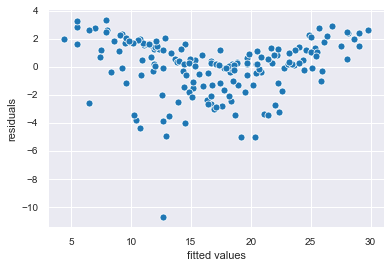

In [15]:
# Plot residuals VS Real values
df['residuals'] = reg_multi.resid
df['fitted values'] = reg_multi.fittedvalues

ax = sns.scatterplot(x="fitted values", y="residuals", data=df)

ax.set(xlabel='fitted values', ylabel='residuals')
plt.show()

An important way of checking whether a regression, simple or multiple, has achieved its goal to explain as much variation as possible in a dependent variable while respecting the underlying assumption, is to check the residuals of a regression. In other words having a detailed look at what is left over after explaining the variation in the dependent variable using independent variable(s).

How to analyze Residuals?

You can start to check the residual with:


   - Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual. We hope to see a value close to zero. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here.
    
    
   - The Jarque-Bera statistic indicates whether or not the residuals (the observed/known dependent variable values minus the predicted/estimated values) are normally distributed. The null hypothesis for this test is that the residuals are normally distributed and so if you were to construct a histogram of those residuals, they would resemble the classic bell curve, or Gaussian distribution. When the p-value (probability) for this test is small (is smaller than 0.05 for a 95% confidence level, for example), the residuals are not normally distributed, indicating model misspecification (a key variable is missing from the model). Results from a misspecified OLS model are not trustworthy.
   
 
   - Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 
   
   
   - Kurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.

#### Normality

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true.
Strictly speaking, non-normality of the residuals is an indication of an inadequate model. It means that the errors the model makes are not consistent across variables and observations (i.e. the errors are not random). The first step should be to look at your data.

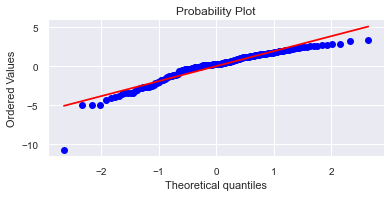

In [48]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)

In [49]:
r**2

0.9066679869702331

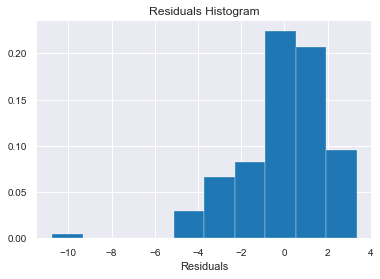

In [8]:
# Plot Residuals
plt.hist(residuals, density=True)
plt.xlabel('Residuals')
plt.title('Residuals Histogram')
plt.show()

It looks quite normally distributed.

#### Homoskedasticity

The assumption of homoscedasticity is that the residuals are approximately equals for all predicted dependent variables scores. In other words, it means that the variance around the regression line is the same for all values of the predictor variable (X). We plot the studentized residuals against fitted values to test their homoscedasticity.

In [9]:
student_residuals = pd.Series(np.abs(reg_multi.get_influence().resid_studentized_internal))

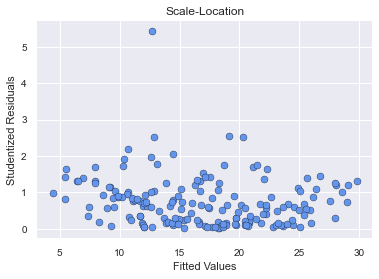

In [10]:
# Studentized Residual

fig, ax = plt.subplots()
ax.scatter(fitted, student_residuals, edgecolors = 'k', facecolors = 'cornflowerblue')

ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')

plt.show()

- Ideally all residuals should be small and unstructured; this then would mean that the regression analysis has been successful in explaining the essential part of the variation of the dependent variable. If however residuals exhibit a structure or present any special aspect that does not seem random, it sheds a "bad light" on the regression. 


- Violation of the homoscedasticity assumption results in heteroscedasticity when values of the dependent variable seem to increase or decrease as a function of the independent variables. Typically, homoscedasticity violations occur when one or more of the variables under investigation are not normally distributed.

We could also test the homoskedasticity of the residuals with the Breusch-Pagan and/or the White tests. Like it's a simple linear regression, let's try the White test.

In our example, it seems like the corresponding residual plot is reasonably random. The residuals are globally unstructured BUT there are (again) some outliers.To confirm that, let's go with a hypothesis test, Harvey-Collier multiplier test, for linearity

##### Tests

In [31]:
import statsmodels.stats.api as sms
sms.linear_harvey_collier(reg_multi)

Ttest_1sampResult(statistic=-1.565945529686271, pvalue=0.1192542929871369)

In [11]:
white_test = het_white(residuals,reg_multi.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 50.239566713549536, 'LM-Test p-value': 1.2378574672575381e-09, 'F-Statistic': 13.728881691029462, 'F-Test p-value': 3.297067597288151e-11}


Heteroskedasticity is indicated if p <0.05, so according to these tests, this model is homoskedastic.

In [11]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(reg_multi.resid, reg_multi.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 4.231064027368323),
 ('p-value', 0.12056912806125976),
 ('f-value', 2.131148563286781),
 ('f p-value', 0.12189895632865029)]

#### Independence

In [22]:
import statsmodels.stats.stattools as st
st.durbin_watson(residuals, axis=0)

2.0772952352565546

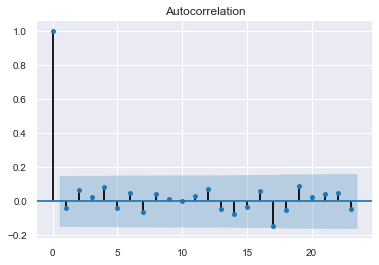

In [29]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(reg_multi.resid, alpha=0.05)
acf.savefig('acf.jpeg')

#### Outliers

We use the studentized residuals to assess if an observation is abnormal. A high residual value characterize an outlier. We normally choose to remove only the outliers which influence the results. To calculate the influence we can use the Cook distance.

In [26]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


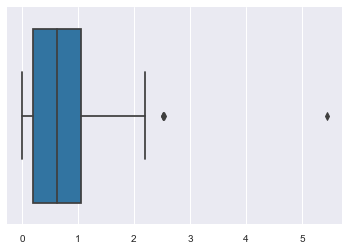

In [30]:
import seaborn as sns
sns.boxplot(x=student_residuals)

In [12]:
# We are going to investigate further on the outliers and influencers
alpha = 0.05
n = df.shape[0] #sample size
p = 1 #number of variables

threshold_leverage = 2*p/n

In [13]:
# Get the leverage for each residual
df2 = pd.DataFrame(student_residuals)
df2.columns = ['student_residuals']
df2['leverage'] = reg_multi.get_influence().hat_matrix_diag
df2['obs'] = np.arange(1, n+1)
df2.head()

,student_residuals,leverage,obs
0,0.760223,0.011647,1
1,0.151381,0.022958,2
2,0.288373,0.007560,3
3,1.156290,0.019450,4
4,0.865843,0.017564,5


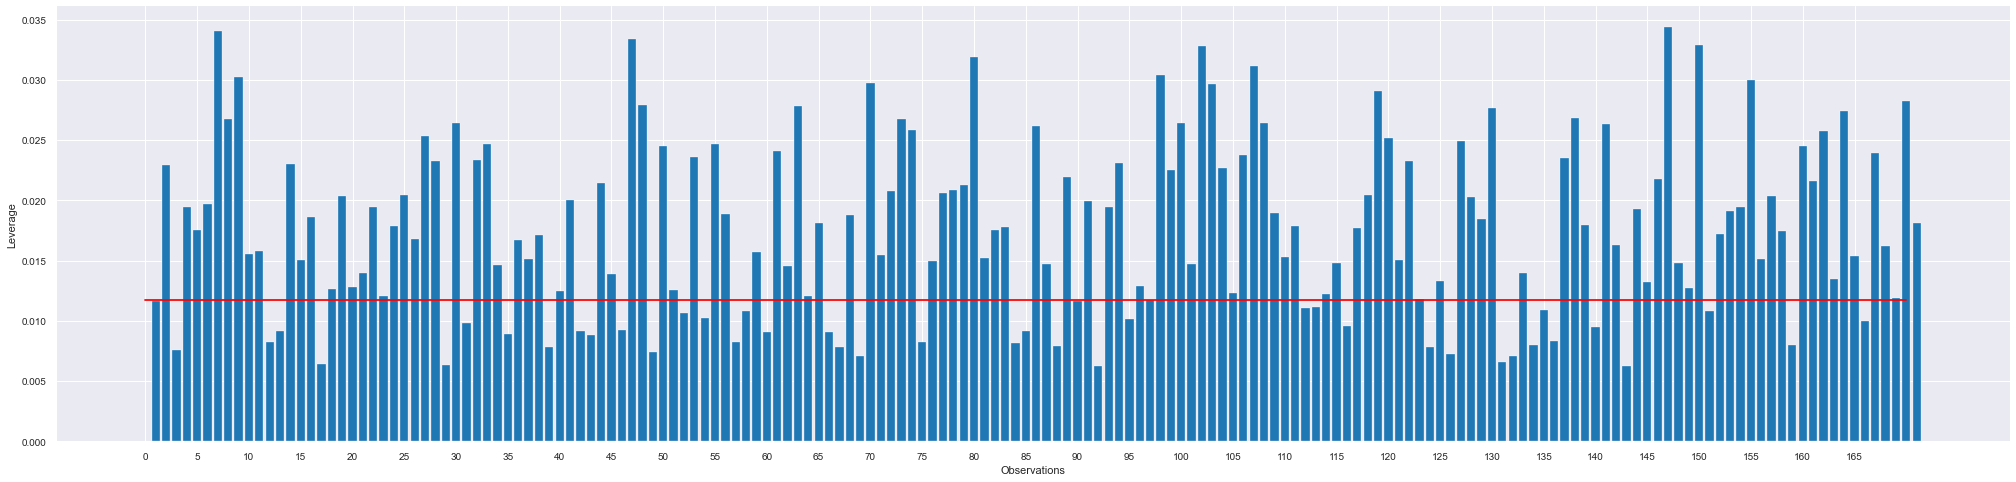

In [14]:
# Plot leverage 
plt.figure(figsize=(35,8))

plt.bar(df2['obs'], df2['leverage'])

plt.xticks(np.arange(0, 170, step=5))
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.plot([0, 170], [threshold_leverage, threshold_leverage], color='r')
plt.show()

In [15]:
# Select data points with leverage above the threshold
outlier = df2.loc[df2['leverage'] > threshold_leverage, :]
outlier

,student_residuals,leverage,obs
1,0.151381,0.022958,2
3,1.156290,0.019450,4
4,0.865843,0.017564,5
5,1.148561,0.019661,6
6,2.525331,0.034057,7
...,...,...,...
166,1.313901,0.023965,167
167,0.906955,0.016211,168
168,0.008928,0.011868,169
169,1.011286,0.028201,170


#### Influencers

In that list of outliers, which one is also an influencer?

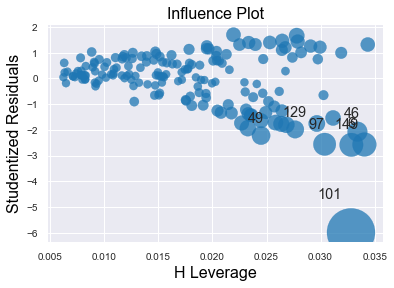

In [22]:
sm.graphics.influence_plot(reg_multi, alpha  = 0.05, criterion="cooks")
plt.show()

On the plot above, it seems like the big influencers are not outliers.

Visually inspecting the data is a
good thing. But being able to detect outliers and/or influential points automatically is
preferable, especially when the number of observations is high. To do this, we need to
define threshold values from which a point becomes suspect. Let's use the Cook distance.

In [17]:
# Get Cook distance
influence = reg_multi.get_influence().summary_frame()
outlier['dcooks'] = influence['cooks_d']
thresh_dcook = 4/(n-p)

/Users/aureliegiraud/.virtualenvs/ebr/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


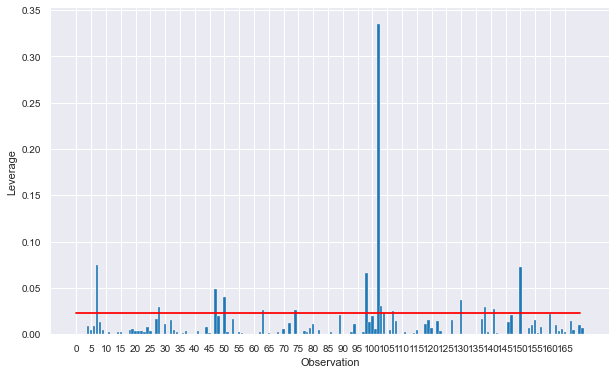

In [18]:
# Plot the influencer
plt.figure(figsize=(10,6))
plt.bar(outlier['obs'], outlier['dcooks'])
plt.xticks(np.arange(0, 170, step=5))
plt.xlabel('Observation')
plt.ylabel('Leverage')
plt.plot([0, 170], [thresh_dcook, thresh_dcook], color='r')
plt.show()

We can see that from the list of outliers, there is no influencers. In other words, there is no necessity to remove the outliers from our dataset. Their influence is limited on the model.

In [23]:
outlier[outlier['dcooks'] >= thresh_dcook]

,student_residuals,leverage,obs,dcooks
6,2.525331,0.034057,7,0.074950
27,1.916688,0.023273,28,0.029179
46,2.048779,0.033413,47,0.048366
49,2.194038,0.024496,50,0.040293
62,1.652105,0.027793,63,0.026009
73,1.705538,0.025826,74,0.025705
97,2.516302,0.030376,98,0.066120
101,5.445253,0.032817,102,0.335351
102,1.740114,0.029655,103,0.030847
106,1.530265,0.031159,107,0.025104


#### Colinearity

In regression, "multicollinearity" refers to predictors that are correlated with other predictors. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. In other words, it results when you have factors that are a bit redundant. 

- You can think about it in terms of a football game: If one player tackles the opposing quarterback, it's easy to give credit for the sack where credit's due. But if three players are tackling the quarterback simultaneously, it's much more difficult to determine which of the three makes the biggest contribution to the sack. Multicollinearity makes some variables statistically insignificant when they should be significant. 

You can check the existence of collinearity between two or more variables with the Condition Number or the VIF. 
   - the Condition Number measures the sensitivity of a function's output as compared to its input. When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30.
   - The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone. Generally, we consider that a VIF > 10 indicates a colinearity problem.

Steps for Implementing VIF: 
- Run a multiple regression.
- Calculate the VIF factors.
- Inspect the factors for each predictor variable.

In [33]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [35]:
df.drop(['sales'],axis=1,inplace=True)

In [36]:
# For each X, calculate VIF and save in dataframe
X = add_constant(df)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1).iloc[1:] #inspect results

,VIF Factor,features
1,1.0,youtube
2,1.1,facebook
3,1.1,newspaper


### Predict

In [105]:
# Predict
input_ = pd.DataFrame({'YearsExperience':[3]})
prediction= reg_simp.predict(input_)

print(round(prediction[0], 2))

54142.09
